In [20]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.signal import argrelmin, argrelmax, argrelextrema
import matplotlib.pyplot as plt
import math

In [32]:
#Function that returns dy/dt
def model(t, z):
    x = z[0]
    y = z[1]
    
    k = .3
    dxdt = -k * x
    
    y_min = 1e-10 
    dydt = -k * max(0, y - y_min)
        
    return dxdt, dydt

#Initial condition 
y0 = [5, 5]

#Solving
y = solve_ivp(model, [0, 200], y0, max_step=.01)

In [33]:
y

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  2.000e+02  2.000e+02]
        y: [[ 5.000e+00  4.985e+00 ...  4.378e-26  4.378e-26]
            [ 5.000e+00  4.985e+00 ...  1.000e-10  1.000e-10]]
      sol: None
 t_events: None
 y_events: None
     nfev: 120008
     njev: 0
      nlu: 0

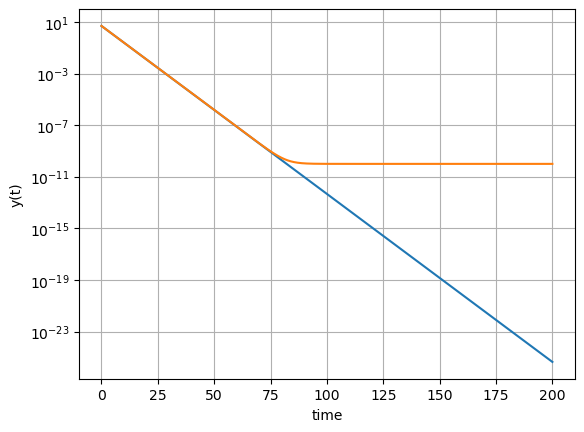

In [34]:
#Plot results
plt.plot(y.t, y.y[0], label='Unaltered')
plt.plot(y.t, y.y[1], label='Altered')

plt.yscale('log')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.grid()
plt.show()

# Example with extra args

In [ ]:
#Function that returns dy/dt
def model(t, y, k):
    dydt = -k * y
    return dydt

#Initial condition 
y0 = [5]

#Solving
sol1 = solve_ivp(model, [0, 20], y0, max_step=.01, args=(.1,)) #args account for k
sol2 = solve_ivp(model, [0, 20], y0, max_step=.01, args=(.2,))
sol3 = solve_ivp(model, [0, 20], y0, max_step=.01, args=(.5,))

In [ ]:
#Plot results
plt.plot(sol1.t, sol1.y[0], 'r-', label='k=0.1')
plt.plot(sol2.t, sol2.y[0], 'b-', label='k=0.2')
plt.plot(sol3.t, sol3.y[0], 'g:', label='k=0.5')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

# Example

Examples pulled from: https://www.youtube.com/watch?v=VV3BnroVjZo

$\frac{dy(t)}{dt} = -y(t) + 1$

$y(0) = 0$


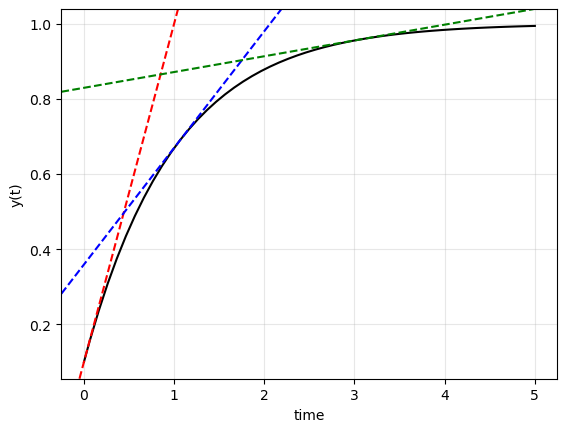

In [ ]:
#Function
def mod1(t, z):
    
    y = z[0]
    dydt = -y + 1
    
    return dydt

#Initial Condition
y0 = [0.1]
sol = solve_ivp(mod1, [0, 5], y0, max_step=.1)
y = sol.y[0]
svs = -y + 1

#Plot results
plt.plot(sol.t, y, color='black', label='Solution')
plt.axline((0, 0.1), slope=.9, color='red', linestyle='--', label='Slope')
plt.axline((sol.t[11], y[11]), slope=(-y[11] + 1), color='blue', linestyle='--', label='Slope')
plt.axline((sol.t[31], y[31]), slope=(-y[31] + 1), color='green', linestyle='--', label='Slope')

plt.xlabel('time')
plt.ylabel('y(t)')
plt.grid(alpha=.3)
plt.show()

# Example: change in parameter at certain time

$5 \frac{dy(t)}{dt} = -y(t) + u(t)$

$y(0)=1$

$u$ steps from $0$ to $2$ at $t = 10$

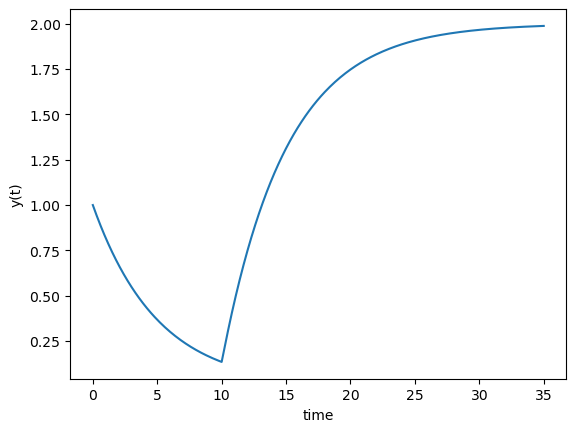

In [3]:
#Funtion
def mod2(t, y):
    
    if t >= 10:
        u = 2
    else:
        u = 0
        
    dydt = (-y + u) / 5
    return dydt

#Initial Condition
y0 = [1]

sol = solve_ivp(mod2, [0, 35], y0, max_step=.1)

#Plot results
plt.plot(sol.t, sol.y[0])
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

# Example: multiple equations

$\frac{dx(t)}{dt} = 3 e^{-t}$

$\frac{dy(t)}{dt} = 3 - y(t)$

$x(0) = 0, \; y(0) = 0$

In [6]:
from math import e

#Funtion
def mod3(t, z):
    x = z[0]
    y = z[1]
    
    dxdt = 3 * e ** (-t)
    dydt = 3 - y
    
    return dxdt, dydt

def event_1(t, z):
    
    x = z[0]
    dxdt = 3 * e ** (-t)
    
    return dxdt

#Initial Condition
z0 = [0, 0]  # x0, y0

sol = solve_ivp(mod3, [0, 10], z0, max_step=.1, events=event_1)

In [8]:
sol.t_events

[array([], dtype=float64)]

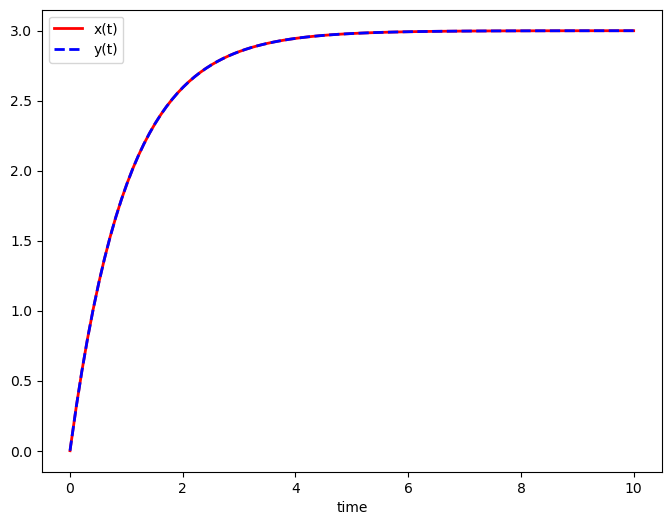

In [3]:
#Plot results
plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y[0], 'r', linewidth= 2, label='x(t)')
plt.plot(sol.t, sol.y[1], 'b--', linewidth = 2, label='y(t)')
plt.xlabel('time')
plt.legend()
plt.show()

# Example: multiple equations, with step func

In [ ]:
#Funtion
def model(t, z):
    x = z[0]
    y = z[1]
    
    if t>= 5:
        u = 2
    else:
        u = 0
    
    dxdt = (-x + u) / 2
    dydt = (-y + x) / 5
    
    return dxdt, dydt


#Initial Condition
z0 = [0, 0]  # x0, y0

sol = solve_ivp(model, [0, 15], z0, max_step=.1)

#Plot results
plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y[0], 'r', linewidth= 2, label='x(t)')
plt.plot(sol.t, sol.y[1], 'b--', linewidth = 2, label='y(t)')
plt.xlabel('time')
plt.legend()
plt.show()

# Challenge Problem: HIV Spread

Link to corresponding problem: http://apmonitor.com/pdc/index.php/Main/SimulateHIV

In [19]:
#Funtion
def model(t, z, kr1, kr2, kr3, kr4, kr5, kr6):
    
    H = z[0] #Healthy cells
    I = z[1] #Infected cells
    V = z[2] #Virus Cells
    
    dh_source = kr1 
    dh_sink   = - kr2 * H - kr3 * H * V
    dHdt = dh_source + dh_sink
    
    di_source = kr3 * H * V
    di_sink   = - kr4 * I
    dIdt = di_source + di_sink
    
    dVdt = -kr3 * H * V - kr5 * V + kr6 * I
    
    return dHdt, dIdt, dVdt


#Initial Conditions
z0 = [1e6, 0, 100]

#Args
kr1 = 1 * 10 ** 5 #new healthy cells per year
kr2 = 0.1 #death rate of healthy cells
kr3 = 2 * 10 ** -7 #healthy cells converting to infected cells
kr4 = 0.5 #death rate of infected cells
kr5 = 5 #death rate of virus
kr6 = 100 # production of virus by infected cells

#Time in years
t = 50

sol = solve_ivp(model, [0, t], z0, args=(kr1, kr2, kr3, kr4, kr5, kr6), max_step=.1)
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  7.071e-05 ...  4.998e+01  5.000e+01]
        y: [[ 1.000e+06  1.000e+06 ...  1.256e+05  1.256e+05]
            [ 0.000e+00  1.414e-03 ...  1.749e+05  1.749e+05]
            [ 1.000e+02  9.996e+01 ...  3.480e+06  3.480e+06]]
      sol: None
 t_events: None
 y_events: None
     nfev: 3026
     njev: 0
      nlu: 0

In [6]:
H = sol.y[0]
I = sol.y[1]
V = sol.y[2]


di_source = (kr3 * H * V)
di_sink   = (- kr4 * I)

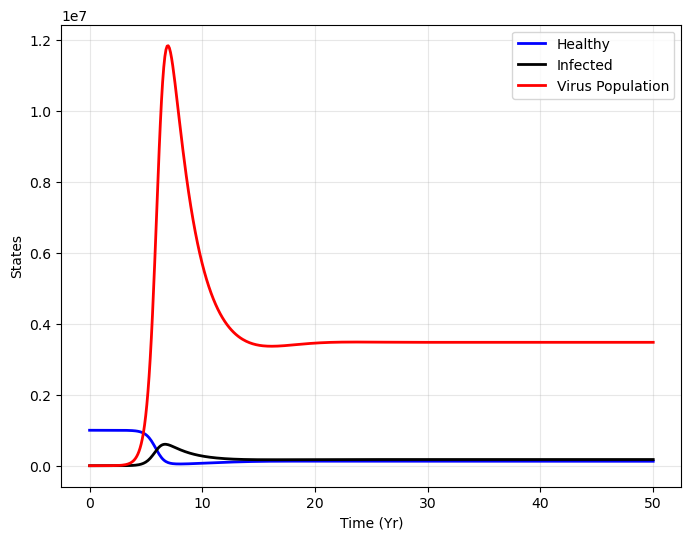

In [13]:
#Plot results
plt.figure(figsize=(8, 6))

plt.plot(sol.t, sol.y[0], 'b', linewidth= 2, label='Healthy')
plt.plot(sol.t, sol.y[1], 'k', linewidth = 2, label='Infected')
plt.plot(sol.t, sol.y[2], 'r', linewidth = 2, label='Virus Population')

# plt.plot(sol.t, di_source, linewidth = 2, label='di_source', alpha=.5)
# plt.plot(sol.t, di_sink, 'r--', linewidth = 2, label='di_sink', alpha=.3)
# plt.plot(sol.t, di_source + di_sink)

# plt.plot(sol.t, z0[0] + sol.y[3] + sol.y[4], 'k', linewidth = 2, label='dh', alpha=.3)
# plt.scatter(sol.t_events[0], sol.y_events[0], label='Event')

plt.xlabel('Time (Yr)')
plt.ylabel('States')

plt.legend(); plt.grid(alpha=.3)
plt.show()

# Finding local min and max of ODE solutions

(array([], dtype=int64),)
(array([62]),)



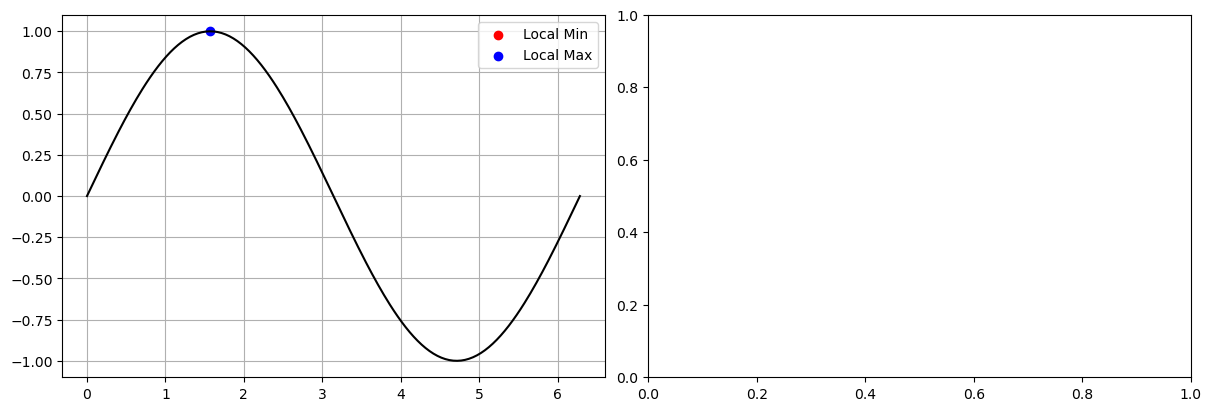

In [15]:
x = np.linspace(0, 2 * np.pi, 250)

y = np.sin(x)
# y = (np.e ** (-.2 * x)) * np.sin(x)
z = np.e ** (-.2 * x)

#Considering last present local min and max
# l_min = argrelmin(y, comparator=np.less_equal)
l_max = argrelextrema(y, comparator=np.greater_equal, mode='wrap')

print(l_min)
print(l_max)
print()

z_min = argrelmin(z)[0]
z_max = argrelmax(z)[0]

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
    
ax[0].plot(x, y, color = 'black')
ax[0].scatter(x[l_min], y[l_min], color = 'red', label = 'Local Min')
ax[0].scatter(x[l_max], y[l_max], color = 'blue', label = 'Local Max')

ax[0].legend()
ax[0].grid()



In [13]:
y[124], y[125]

(0.9999801019909555, 0.9999801019909555)

NA


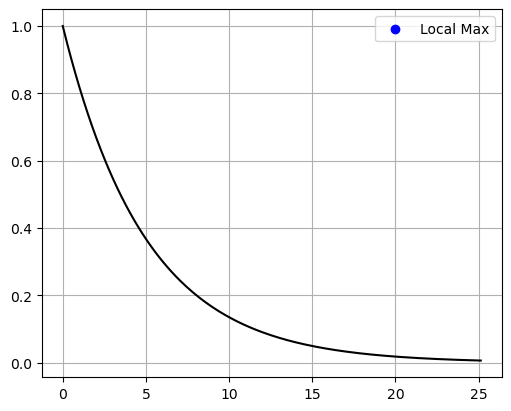

In [12]:
x = np.linspace(0, 8 * np.pi, 200)

y = (np.e ** (-.2 * x)) #* np.sin(x)
#z = np.e ** (-.2 * x)

#Find local max 
l_max = argrelmax(y)[0] #indices
x_max = x[l_max] #actual x values
y_max = y[l_max]

def difference(x_max):
    
    l = len(x_max)
    differences = []
    
    if l > 1:
        for i in range(l - 1):
            differences.append(x_max[i + 1] - x_max[i])
    else:
        differences = "NA"
        
    return differences

print(difference(x_max))

fig, ax = plt.subplots(1, constrained_layout=True, figsize=(5, 4))
    
ax.plot(x, y, color = 'black')
ax.scatter(x_max, y_max, color = 'blue', label = 'Local Max')

ax.legend()
ax.grid()




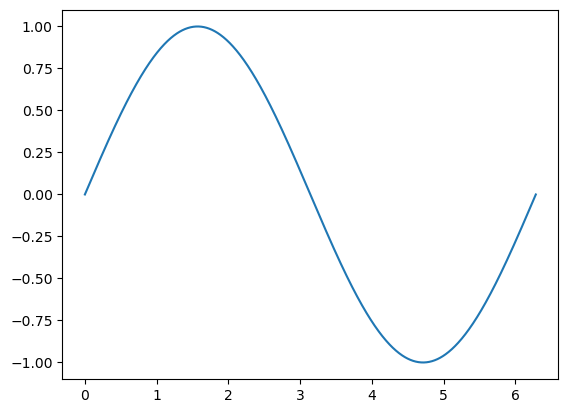

In [2]:
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)

plt.plot(x, y)
plt.show()

In [10]:
l

3.179970900197758e-22
Is ref close enough to zero? True

[]
0



IndexError: index 0 is out of bounds for axis 0 with size 0

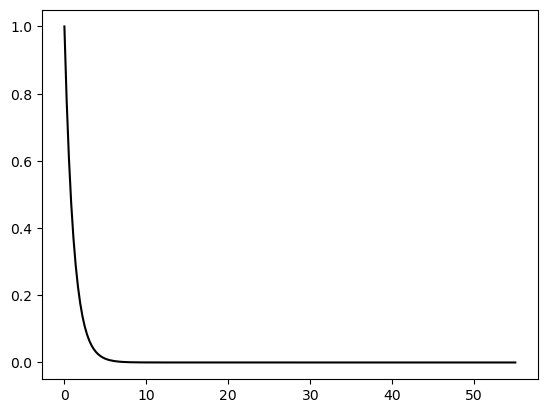

In [62]:
x = np.linspace(0, 55, 200)
y = (np.e ** (-.9 * x))

plt.plot(x, y, color = 'black')

ref = y[-1]
print(ref)

print("Is ref close enough to zero?", np.isclose(ref, 0))
print()

if np.isclose(ref, 0):

    check = np.where(np.isclose(y, 1e-10, atol=1e-11))
    print(check[0])
    print(len(check[0]))
    print()

    loc = check[0][0]
    print("First instance: index", loc)

    plt.scatter(x[loc], y[loc], color = 'blue', label = '1e-10')



plt.yscale('log')
plt.grid(alpha=.3)

In [52]:
check

(array([], dtype=int64),)

119

In [41]:
np.where(np.isclose(y, 1e-10, atol=1e-10))

(array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
        181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
        194, 195, 196, 197, 198, 199]),)

3.179970900197758e-22

In [ ]:
#Investigation of funky phytoplankton

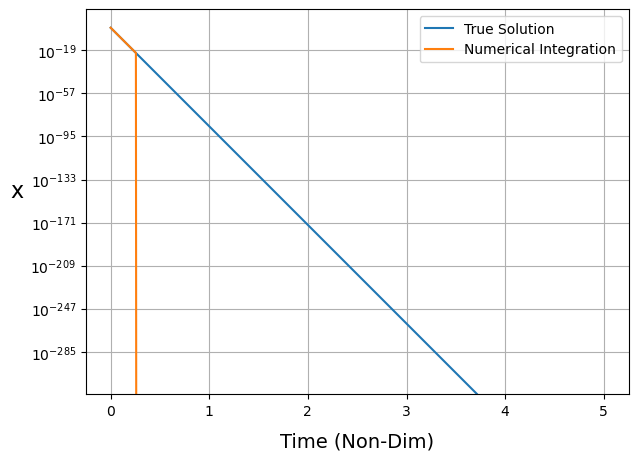

In [50]:
def model(t, z):
    
    x = z[0]
    dxdt = -200 * x
    
    return dxdt

t = [0, 5]

sol = solve_ivp(model, t, [5], max_step = .01, method='LSODA', atol=1e-20)

x = np.linspace(0, 5, 500)
y = 5 * np.e ** (-200 * x)

fig = plt.figure(figsize=(7, 5))

plt.plot(x, y, label="True Solution")
plt.plot(sol.t, sol.y[0], label="Numerical Integration")


# plt.title()
plt.xlabel('Time (Non-Dim)', labelpad=10, fontsize=14)
plt.ylabel('x', rotation=0, labelpad=10, fontsize=16)
plt.yscale('log')
# plt.ylim(1e-20, 1e4)
plt.grid()
plt.legend()